# Задание по кластеризации

Попробуем реализовать эвристику выбора центроидов:
* запустим несколько раз алгоритм, запомним, куда попали центроиды при каждом запуске
* усредним координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$, см. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](img/several_init_knn.png)

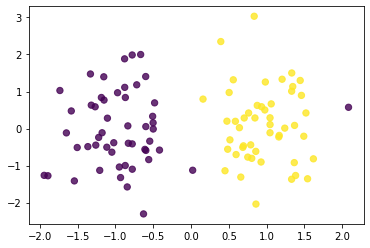

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()

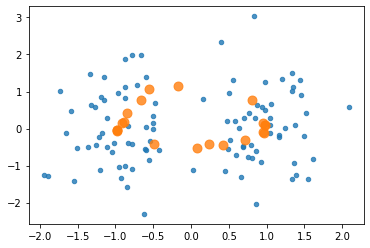

In [2]:
# -- ВАШ КОД ТУТ --
from sklearn.cluster import KMeans

c = np.zeros((10,2,2))

for i in range(10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2).fit(X)
    c[i,:,:] = kmeans_model.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], s=20, marker='o', alpha=0.8, label='data')
plt.scatter(c[:, :, 0], c[:, :, 1], s=80, marker='o', alpha=0.8, label='data')
plt.show()
# ------------------

### Задача 2

посчитать сумму внутрикластерных расстояний от каждой точки до центроида

**Внимание**: циклы использовать запрещено, воспользоваться функциями `numpy`

In [3]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --

E = np.ones((10,1))
centroid_10_2 = np.dot(E,centroid.reshape(1,-1))
A = clust-centroid_10_2
A_2 = A**2
intra_cluster_distance = np.sum((A_2[:,0]+A_2[:,1])**0.5)
print("Ответ, полученный первым способом:", intra_cluster_distance)

# второй способ
intra_cluster_distance_2 = euclidean_distances(centroid.reshape(1,-1),clust).sum()
print("Ответ, полученный вторым способом:", intra_cluster_distance_2)

# ------------------

Ответ, полученный первым способом: 11.440582444503534
Ответ, полученный вторым способом: 11.440582444503534


Тестируем корректность вычислений

In [4]:
import unittest

class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(intra_cluster_distance, 11.44058, places=5)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


**Задача на DBSCAN**

Обучите модель DBSCAN с параметром `min_samples=8` и `eps=0.6`

Визуализируйте результат.

Сравните внутрикластерное расстояние со случаем `min_samples = 3`. Стало лучше или хуже?

In [5]:
import numpy as np
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import DBSCAN

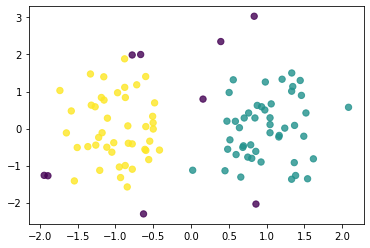

Внутрикластерные расстояния для min_samples=8
36.76246570394294 37.66036488622397

Внутрикластерные расстояния для min_samples=3
44.07017151664235 38.786526133732664

При изменении значения min_samples с 8 на 3 внутрикластерные расстояния стали хуже


In [6]:
# ---- ВАШ КОД ТУТ -----

db_8 = DBSCAN(eps=0.6, min_samples=8).fit(X)
labels = db_8.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

print("Внутрикластерные расстояния для min_samples=8")
x_centr_1 = X[labels==0][:,0].sum()/X[labels==0].shape[0]
y_centr_1 = X[labels==0][:,1].sum()/X[labels==0].shape[0]
centroid1 = np.array([x_centr_1, y_centr_1])
intra_cluster1_distance = euclidean_distances(centroid1.reshape(1,-1),X[labels==0]).sum()

x_centr_2 = X[labels==1][:,0].sum()/X[labels==1].shape[0]
y_centr_2 = X[labels==1][:,1].sum()/X[labels==1].shape[0]
centroid2 = np.array([x_centr_2, y_centr_2])
intra_cluster2_distance = euclidean_distances(centroid2.reshape(1,-1),X[labels==1]).sum()
print(intra_cluster2_distance, intra_cluster1_distance)

print("\nВнутрикластерные расстояния для min_samples=3")
db_3 = DBSCAN(eps=0.6, min_samples=3).fit(X)
labels = db_3.labels_

x_centr_1 = X[labels==0][:,0].sum()/X[labels==0].shape[0]
y_centr_1 = X[labels==0][:,1].sum()/X[labels==0].shape[0]
centroid1 = np.array([x_centr_1, y_centr_1])
intra_cluster1_distance = euclidean_distances(centroid1.reshape(1,-1),X[labels==0]).sum()

x_centr_2 = X[labels==1][:,0].sum()/X[labels==1].shape[0]
y_centr_2 = X[labels==1][:,1].sum()/X[labels==1].shape[0]
centroid2 = np.array([x_centr_2, y_centr_2])
intra_cluster2_distance = euclidean_distances(centroid2.reshape(1,-1),X[labels==1]).sum()
print(intra_cluster2_distance, intra_cluster1_distance)

print("\nПри изменении значения min_samples с 8 на 3 внутрикластерные расстояния стали хуже")
# ----------------------

#### Задача на метрики кластеризации

Обучите *k-means* из модуля sklearn для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта в сравнении со случаем $k=2$? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше мо метрике AMI?

In [7]:
import pickle
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

with open('data/clustering.pkl', 'rb') as f:
    data = pickle.load(f)

data.keys()

# ---- ВАШ КОД ТУТ -----

kmeans_2 = KMeans(n_clusters=2).fit(X)
score_2 = silhouette_score(X, kmeans_2.labels_)

kmeans_4 = KMeans(n_clusters=4).fit(X)
score_4 = silhouette_score(X, kmeans_4.labels_)

print("Метрика Силуэтта:")
print("Коэффициент Силуэтта для 2-х кластеров", score_2)
print("Коэффициент Силуэтта для 4-х кластеров", score_4)
print("Коэффициент Силуэтта для 2-х кластеров ближе к 1, чем коэффициент Силуэтта для 4-х кластеров, поэтому 2 кластера лучше")

AMI_score_2 = adjusted_mutual_info_score(Y, kmeans_2.labels_, average_method='arithmetic')
AMI_score_4 = adjusted_mutual_info_score(Y, kmeans_4.labels_, average_method='arithmetic')
print("\nМетрика AMI:")
print("Коэффициент AMI для 2-х кластеров", AMI_score_2)
print("Коэффициент AMI для 4-х кластеров", AMI_score_4)
print("Коэффициент AMI для 2-х кластеров ближе к 1, чем коэффициент AMI для 4-х кластеров, поэтому 2 кластера лучше")

# ----------------------

Метрика Силуэтта:
Коэффициент Силуэтта для 2-х кластеров 0.4465356047465253
Коэффициент Силуэтта для 4-х кластеров 0.43876658736739316
Коэффициент Силуэтта для 2-х кластеров ближе к 1, чем коэффициент Силуэтта для 4-х кластеров, поэтому 2 кластера лучше

Метрика AMI:
Коэффициент AMI для 2-х кластеров 0.9286022516535728
Коэффициент AMI для 4-х кластеров 0.5818466760077641
Коэффициент AMI для 2-х кластеров ближе к 1, чем коэффициент AMI для 4-х кластеров, поэтому 2 кластера лучше


### Домашнее задание по PCA

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff'

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

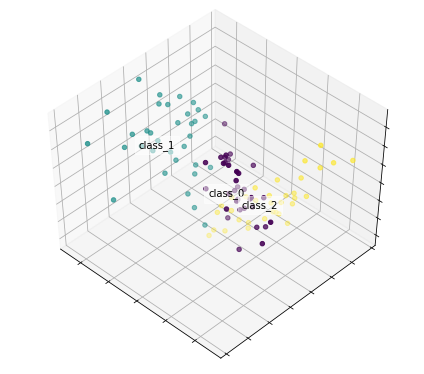

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](img/classification_dim_reduction.png)

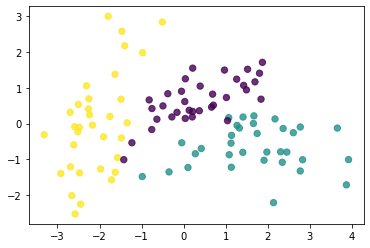

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=40, c=y, marker='o', alpha=0.8, label='data')
plt.show()

#### Домашнее задание по SVD

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

<class 'numpy.ndarray'> (202, 310, 3)


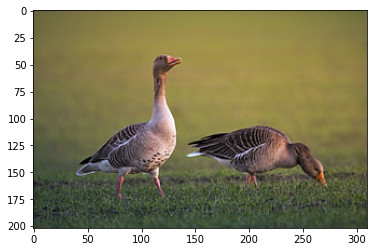

In [10]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('img/gray_goose.jpg')
print(type(img),img.shape)
imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

<class 'numpy.ndarray'> (202, 310)


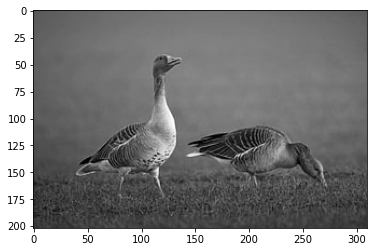

In [11]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

Далее 

* обучите на массиве *img_gray* размерности $202 \times 310$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должен получиться гусь как бы в очень нечётком виде


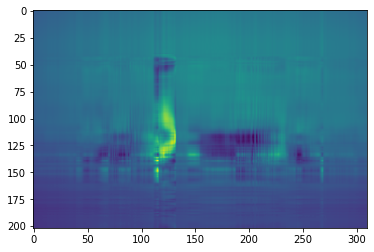

In [12]:
# -- ВАШ КОД ТУТ --
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=5).fit(img_gray)
img_gray_svd = svd_model.transform(img_gray)
img_gray_svd_restored = svd_model.inverse_transform(img_gray_svd)
plt.imshow(img_gray_svd_restored)
plt.show()

# -----------------

**Домашнее задание на применение t-sne**

Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

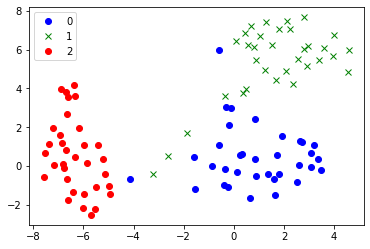

In [13]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)

colors = ['bo', 'gx', 'ro']
# И нарисуем получившиеся точки в нашем новом пространстве
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0);

Код для вычисления качества моделей

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('data/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [15]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
print("PCA")
eval_model(X_pca, y)


tsne_transformer = TSNE(n_components=2)
X_tsne = tsne_transformer.fit_transform(X)
print("\nTSNE")
eval_model(X_tsne, y)

print("\nКачество модели TSNE лучше PCA")

PCA
Accuracy: 0.83333

TSNE
Accuracy: 0.86667

Качество модели TSNE лучше PCA
